In [44]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold, cross_val_score

In [4]:
dataPath = '../../preprocess_train_dataset/encodedData_01.csv'

df_spaceship = pd.read_csv(dataPath)

df_spaceship.shape

(8693, 36)

In [6]:
df_spaceship

,PassengerId,HomePlanet,Earth,Europa,Mars,CryoSleep,Cabin_deck,Cabin_deck_A,Cabin_deck_B,Cabin_deck_C,...,FoodCourt,ShoppingMall,Spa,VRDeck,Total_spending,First_Name,Last_Name,First_Name_le,Last_Name_le,Transported
0,0001_01,Europa,False,True,False,False,B,False,True,False,...,0.0,0.0,0.0,0.0,0.0,Maham,Ofracculy,1614,1431,False
1,0002_01,Earth,True,False,False,False,F,False,False,False,...,9.0,25.0,549.0,44.0,736.0,Juanna,Vines,1407,2109,True
2,0003_01,Europa,False,True,False,False,A,True,False,False,...,3576.0,0.0,6715.0,49.0,10383.0,Altark,Susent,156,1990,False
3,0003_02,Europa,False,True,False,False,A,True,False,False,...,1283.0,371.0,3329.0,193.0,5176.0,Solam,Susent,2276,1990,False
4,0004_01,Earth,True,False,False,False,F,False,False,False,...,70.0,151.0,565.0,2.0,1091.0,Willy,Santantines,2642,1778,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,True,False,False,A,True,False,False,...,6819.0,0.0,1643.0,74.0,8536.0,Gravior,Noxnuther,1135,1416,False
8689,9278_01,Earth,True,False,False,True,G,False,False,False,...,0.0,0.0,0.0,0.0,0.0,Kurta,Mondalley,1492,1341,False
8690,9279_01,Earth,True,False,False,False,G,False,False,False,...,0.0,1872.0,1.0,0.0,1873.0,Fayey,Connon,955,470,True
8691,9280_01,Europa,False,True,False,False,E,False,False,False,...,1049.0,0.0,353.0,3235.0,4637.0,Celeon,Hontichre,526,996,False


In [7]:
df_spaceship.dtypes

PassengerId        object
HomePlanet         object
Earth                bool
Europa               bool
Mars                 bool
CryoSleep            bool
Cabin_deck         object
Cabin_deck_A         bool
Cabin_deck_B         bool
Cabin_deck_C         bool
Cabin_deck_D         bool
Cabin_deck_E         bool
Cabin_deck_F         bool
Cabin_deck_G         bool
Cabin_deck_T         bool
Cabin_num           int64
Cabin_side         object
Cabin_side_P         bool
Cabin_side_S         bool
Destination        object
55 Cancri e          bool
PSO J318.5-22        bool
TRAPPIST-1e          bool
Age               float64
VIP                  bool
RoomService       float64
FoodCourt         float64
ShoppingMall      float64
Spa               float64
VRDeck            float64
Total_spending    float64
First_Name         object
Last_Name          object
First_Name_le       int64
Last_Name_le        int64
Transported          bool
dtype: object

In [8]:
train_x, train_y = df_spaceship.drop(columns=['Transported']), df_spaceship['Transported']

In [9]:
# drop categorical data, remain the one hot encoded ones 

train_x.drop(['PassengerId', 'HomePlanet', 'Cabin_deck', 'Cabin_side', 'Destination', 'First_Name', 'First_Name_le', 'Last_Name'], axis=1, inplace=True)

In [15]:
train_x

,Earth,Europa,Mars,CryoSleep,Cabin_deck_A,Cabin_deck_B,Cabin_deck_C,Cabin_deck_D,Cabin_deck_E,Cabin_deck_F,...,TRAPPIST-1e,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Total_spending,Last_Name_le
0,False,True,False,False,False,True,False,False,False,False,...,True,39.0,False,0.0,0.0,0.0,0.0,0.0,0.0,1431
1,True,False,False,False,False,False,False,False,False,True,...,True,24.0,False,109.0,9.0,25.0,549.0,44.0,736.0,2109
2,False,True,False,False,True,False,False,False,False,False,...,True,58.0,True,43.0,3576.0,0.0,6715.0,49.0,10383.0,1990
3,False,True,False,False,True,False,False,False,False,False,...,True,33.0,False,0.0,1283.0,371.0,3329.0,193.0,5176.0,1990
4,True,False,False,False,False,False,False,False,False,True,...,True,16.0,False,303.0,70.0,151.0,565.0,2.0,1091.0,1778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,False,True,False,False,True,False,False,False,False,False,...,False,41.0,True,0.0,6819.0,0.0,1643.0,74.0,8536.0,1416
8689,True,False,False,True,False,False,False,False,False,False,...,False,18.0,False,0.0,0.0,0.0,0.0,0.0,0.0,1341
8690,True,False,False,False,False,False,False,False,False,False,...,True,26.0,False,0.0,0.0,1872.0,1.0,0.0,1873.0,470
8691,False,True,False,False,False,False,False,False,True,False,...,False,32.0,False,0.0,1049.0,0.0,353.0,3235.0,4637.0,996


In [16]:
train_y

0       False
1        True
2       False
3       False
4        True
        ...  
8688    False
8689    False
8690     True
8691    False
8692     True
Name: Transported, Length: 8693, dtype: bool

1.Feature Selection

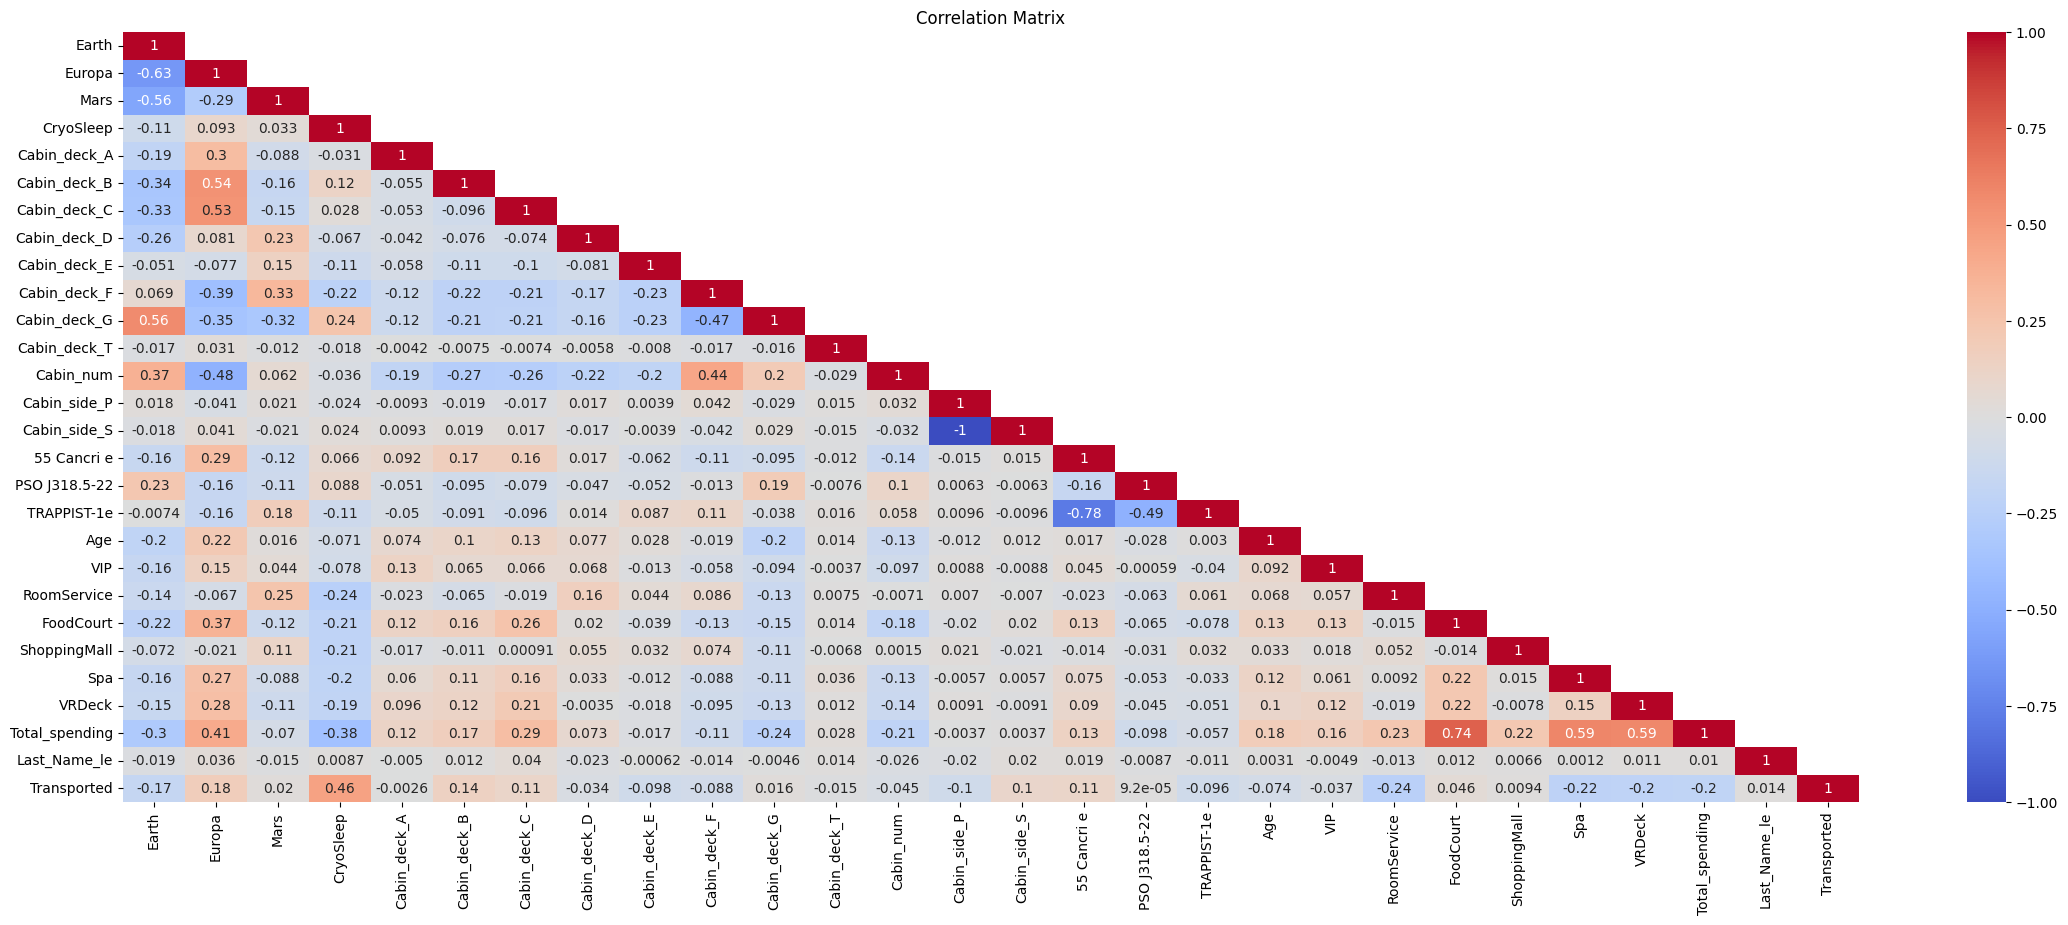

{'Cabin_side_P', 'Cabin_deck_B', 'VRDeck', 'Europa', 'Earth', 'Cabin_deck_C', 'Transported', 'Total_spending', 'Spa', '55 Cancri e', 'CryoSleep', 'RoomService'}


In [40]:

dataframe = pd.DataFrame(pd.concat([train_x, train_y], axis=1))

# Compute correlation matrix
correlation_matrix = dataframe.corr()

# Visualize correlation matrix
plt.figure(figsize=(28, 10))

# Getting the Upper Triangle of the correlation matrix as mask
triu = np.triu(correlation_matrix, k=1)
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", mask=triu)
plt.title("Correlation Matrix")
plt.show()

#  Remove features with low correlation to the output
output_correlation_threshold = 0.1  # Adjust this threshold as needed
low_correlation_features = correlation_matrix[abs(correlation_matrix["Transported"]) < output_correlation_threshold].index
dataframe.drop(columns=low_correlation_features, inplace=True)

#  Remove highly correlated features
highly_correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.9:  # Adjust this threshold as needed
            feature_i = correlation_matrix.columns[i]
            feature_j = correlation_matrix.columns[j]
            highly_correlated_features.add(feature_i)  # Remove feature_i

highly_correlated_features = highly_correlated_features & set(dataframe.columns)
dataframe.drop(columns=highly_correlated_features, inplace=True)

# Display the modified dataset after dropping the unwanted features
print(set(dataframe.columns))

2.Feature Scaling

In [42]:
# Exclude the output column from feature scaling
columns_to_scale = [col for col in dataframe.columns if col != "Transported"]

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the data
dataframe[columns_to_scale] = scaler.fit_transform(dataframe[columns_to_scale])



      Earth  Europa  CryoSleep  Cabin_deck_B  Cabin_deck_C  Cabin_side_P  \
0       0.0     1.0        0.0           1.0           0.0           1.0   
1       1.0     0.0        0.0           0.0           0.0           0.0   
2       0.0     1.0        0.0           0.0           0.0           0.0   
3       0.0     1.0        0.0           0.0           0.0           0.0   
4       1.0     0.0        0.0           0.0           0.0           0.0   
...     ...     ...        ...           ...           ...           ...   
8688    0.0     1.0        0.0           0.0           0.0           1.0   
8689    1.0     0.0        1.0           0.0           0.0           0.0   
8690    1.0     0.0        0.0           0.0           0.0           0.0   
8691    0.0     1.0        0.0           0.0           0.0           0.0   
8692    0.0     1.0        0.0           0.0           0.0           0.0   

      55 Cancri e  RoomService       Spa    VRDeck  Total_spending  \
0             0.0

In [43]:
# Display the modified dataset after feature scaling
dataframe

,Earth,Europa,CryoSleep,Cabin_deck_B,Cabin_deck_C,Cabin_side_P,55 Cancri e,RoomService,Spa,VRDeck,Total_spending,Transported
0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.000000,False
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007608,0.024500,0.001823,0.020452,True
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.003001,0.299670,0.002030,0.288521,False
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.148563,0.007997,0.143830,False
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.021149,0.025214,0.000083,0.030317,True
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.000000,0.073322,0.003066,0.237197,False
8689,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,False
8690,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000045,0.000000,0.052047,True
8691,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.015753,0.134049,0.128852,False


3.Parameter Tuning

In [45]:
import warnings
warnings.filterwarnings("ignore",category=FutureWarning,module="sklearn")

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


train_x=dataframe.iloc[:, :-1].values
train_y=dataframe.iloc[:, -1].values



# Split the dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.2, random_state=42)

# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 10],
    'metric': ['euclidean', 'manhattan','minkowski']
}

# Initialize the K-Nearest Neighbors classifier
knn = KNeighborsClassifier()

# Perform grid search to find the best parameters
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Make predictions on the test data using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the accuracy of the best model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy (Best Model): {:.2f}%".format(accuracy * 100))

#  Print the best parameters found by grid search
print("Best Parameters:", grid_search.best_params_)


Accuracy (Best Model): 77.80%
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 10}


prediction
D:\Comp4433_spaceship-titanic\preprocess_test_dataset\encoded_testData_01.csv

In [50]:
test_dataPath = '../../preprocess_test_dataset/encoded_testData_01.csv'
df_test = pd.read_csv(test_dataPath)

print(df_test.shape)
print(df_test.columns)

(4277, 35)
Index(['PassengerId', 'HomePlanet', 'Earth', 'Europa', 'Mars', 'CryoSleep',
       'Cabin_deck', 'Cabin_deck_A', 'Cabin_deck_B', 'Cabin_deck_C',
       'Cabin_deck_D', 'Cabin_deck_E', 'Cabin_deck_F', 'Cabin_deck_G',
       'Cabin_deck_T', 'Cabin_num', 'Cabin_side', 'Cabin_side_P',
       'Cabin_side_S', 'Destination', '55 Cancri e', 'PSO J318.5-22',
       'TRAPPIST-1e', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall',
       'Spa', 'VRDeck', 'Total_spending', 'First_Name', 'Last_Name',
       'First_Name_le', 'Last_Name_le'],
      dtype='object')


In [52]:

# remove and make your own predictions.
X_dataframe = pd.DataFrame(df_test)

dataframe.iloc[:, :-1]

# Select only the columns present in the training dataset
X_private_selected = X_dataframe[dataframe.iloc[:, :-1].columns]


# Make predictions on the test dataset
preds = grid_search.predict(X_private_selected)

# drop categorical data, remain the one hot encoded ones 
df_test_PassengerId = df_test['PassengerId']
output_path = '../../output_prediction/'

submission_02 = pd.DataFrame({'PassengerId': df_test_PassengerId, 'Transported': preds})
submission_02.to_csv(output_path+'KNN.csv', index=False, index_label=False)


C:\Users\865u5\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


Shape of X_public: (30000, 58)
Shape of y_public: (30000,)


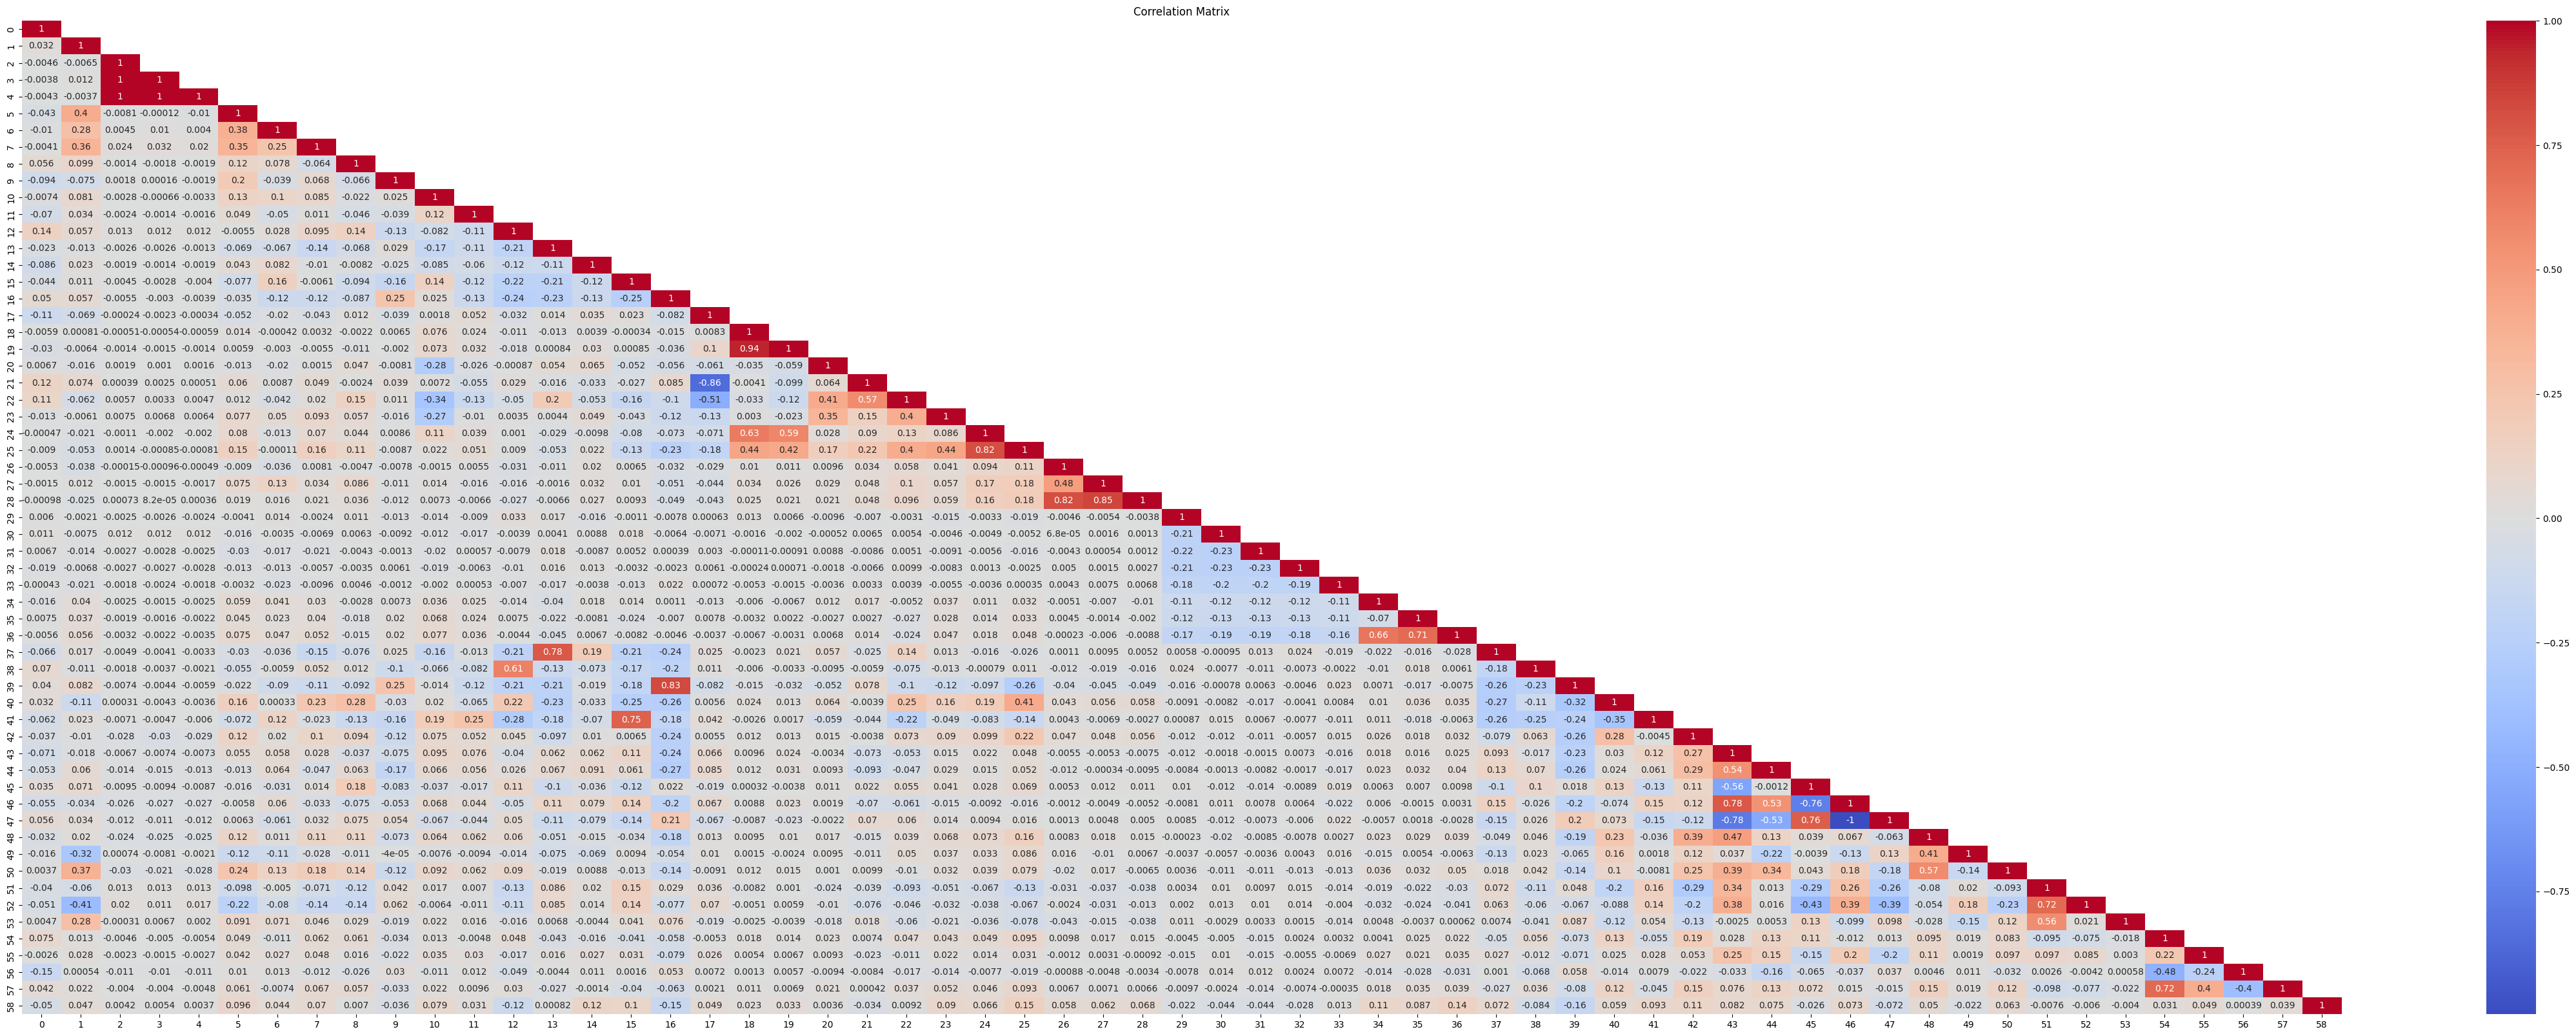

{34, 36, 42, 12, 14, 15, 16, 58}
        12   14   15   16   34   36        42   58
0      0.0  0.0  0.0  0.0  0.0  0.0  0.604654  0.0
1      0.0  0.0  0.0  0.0  0.0  0.0  0.274729  0.0
2      0.0  0.0  1.0  0.0  0.0  1.0  0.301486  1.0
3      1.0  0.0  0.0  0.0  0.0  0.0  0.425568  1.0
4      0.0  0.0  0.0  1.0  0.0  0.0  0.382016  0.0
...    ...  ...  ...  ...  ...  ...       ...  ...
29995  1.0  0.0  0.0  0.0  0.0  0.0  0.460830  0.0
29996  0.0  0.0  1.0  0.0  0.0  0.0  0.511503  1.0
29997  0.0  0.0  0.0  0.0  0.0  0.0  0.484780  0.0
29998  0.0  0.0  1.0  0.0  0.0  0.0  0.489340  1.0
29999  0.0  0.0  0.0  0.0  0.0  0.0  0.660714  1.0

[30000 rows x 8 columns]
Accuracy (Best Model): 58.98%
Best Parameters: {'metric': 'euclidean', 'n_neighbors': 10}
Shape of X_private: (5000, 58)


In [29]:
import pandas as pd
import os

def read_data_from_csv(path):
    """Load datasets from CSV files.
    Args:
        path (str): Path to the CSV file.
    Returns:
        X (np.ndarray): Features of samples.
        y (np.ndarray): Labels of samples, only provided in the public datasets.
    """
    assert os.path.exists(path), f'File not found: {path}!'
    assert os.path.splitext(path)[
        -1] == '.csv', f'Unsupported file type {os.path.splitext(path)[-1]}!'

    data = pd.read_csv(path)
    column_list = data.columns.values.tolist()

    if 'Label' in column_list:
        # for the public dataset, label column is provided.
        column_list.remove('Label')
        X = data[column_list].values
        y = data['Label'].astype('int').values
        return X, y
    else:
        # for the private dataset, label column is not provided.
        X = data[column_list].values
        return X


X_public, y_public = read_data_from_csv('assignment_5_public.csv')
print('Shape of X_public:', X_public.shape)  # n_sample, m_feature (30000, 58)
print('Shape of y_public:', y_public.shape)  # n_sample (30000,)

'''
CODE HERE!
'''
import numpy as np

# Reshape X_public to match the shape of y_public
reshaped_X_public = X_public.reshape(y_public.shape[0], -1)

# Combine the arrays into a DataFrame
dataframe = pd.DataFrame(np.column_stack((reshaped_X_public, y_public)))

#1.Feature Selection
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
correlation_matrix = dataframe.corr()

# Visualize correlation matrix
plt.figure(figsize=(58, 20))

# Getting the Upper Triangle of the correlation matrix as mask
triu = np.triu(correlation_matrix, k=1)
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", mask=triu)
plt.title("Correlation Matrix")
plt.show()

#  Remove features with low correlation to the output
output_correlation_threshold = 0.1  # Adjust this threshold as needed
low_correlation_features = correlation_matrix[abs(correlation_matrix[58]) < output_correlation_threshold].index
dataframe.drop(columns=low_correlation_features, inplace=True)

#  Remove highly correlated features
highly_correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:  # Adjust this threshold as needed
            feature_i = correlation_matrix.columns[i]
            feature_j = correlation_matrix.columns[j]
            highly_correlated_features.add(feature_i)  # Remove feature_i

highly_correlated_features = highly_correlated_features & set(dataframe.columns)
dataframe.drop(columns=highly_correlated_features, inplace=True)

# Display the modified dataset after dropping the unwanted features
print(set(dataframe.columns))

#2.Feature Scaling
from sklearn.preprocessing import MinMaxScaler

# Exclude the output column from feature scaling
columns_to_scale = [col for col in dataframe.columns if col != 58]

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the data
dataframe[columns_to_scale] = scaler.fit_transform(dataframe[columns_to_scale])

# Display the modified dataset after feature scaling
print(dataframe)

#3.Parameter Tuning
import warnings
warnings.filterwarnings("ignore",category=FutureWarning,module="sklearn")

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


X_public=dataframe.iloc[:, :-1].values

# Split the dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X_public, y_public, test_size=0.2, random_state=42)

# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 10],
    'metric': ['euclidean', 'manhattan','minkowski']
}

# Initialize the K-Nearest Neighbors classifier
knn = KNeighborsClassifier()

# Perform grid search to find the best parameters
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Make predictions on the test data using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the accuracy of the best model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy (Best Model): {:.2f}%".format(accuracy * 100))

#  Print the best parameters found by grid search
print("Best Parameters:", grid_search.best_params_)


X_private = read_data_from_csv('assignment_5_private.csv')
print('Shape of X_private:', X_private.shape)  # k_sample, m_feature (5000, 58)

'''
CODE HERE!
'''
import numpy as np

# remove and make your own predictions.
X_dataframe = pd.DataFrame(X_private)

dataframe.iloc[:, :-1]

# Select only the columns present in the training dataset
X_private_selected = X_dataframe[dataframe.iloc[:, :-1].columns]


# Make predictions on the test dataset
preds = grid_search.predict(X_private_selected)


submission = pd.DataFrame({'Label': preds})
submission.to_csv('assignment_5.csv', index=True, index_label='Id')